# Twitter API

##### Why Twitter ?


"While physics and math may tell us how the universe began, they are not much use in predicting Human Behavior because there are far too many Equations to Solve" 
    
    -Stephan Hawking
    

#### Rest API vs Streaming API: 


REST:  
    - Query user accounts using OAuth
    - Allows you to access 'historical' tweets

STREAM: 
    - Essentially long-running request (left Open) using OAuth
    - Access realtime stream of data
       

## Rest API

You may need to install some packages for this notebook

In [32]:
!pip install requests_oauthlib tweepy cnfg -U

Requirement already up-to-date: requests_oauthlib in /Users/soph/miniconda3/lib/python3.6/site-packages (0.8.0)
Requirement already up-to-date: tweepy in /Users/soph/miniconda3/lib/python3.6/site-packages (3.6.0)
Requirement already up-to-date: cnfg in /Users/soph/miniconda3/lib/python3.6/site-packages (1.0.0)
Requirement not upgraded as not directly required: oauthlib>=0.6.2 in /Users/soph/miniconda3/lib/python3.6/site-packages (from requests_oauthlib) (2.0.7)
Requirement not upgraded as not directly required: requests>=2.0.0 in /Users/soph/miniconda3/lib/python3.6/site-packages (from requests_oauthlib) (2.18.4)
Requirement not upgraded as not directly required: PySocks>=1.5.7 in /Users/soph/miniconda3/lib/python3.6/site-packages (from tweepy) (1.6.7)
Requirement not upgraded as not directly required: six>=1.10.0 in /Users/soph/miniconda3/lib/python3.6/site-packages (from tweepy) (1.11.0)
Requirement not upgraded as not directly required: chardet<3.1.0,>=3.0.2 in /Users/soph/miniconda

In [8]:
import requests
# import cnfg
import html
import tweepy
from requests_oauthlib import OAuth1 # 
import pandas as pd
from pprint import pprint

In [17]:

import tweepy 
  
# Fill the X's with the credentials obtained by  
# following the above mentioned procedure. 
consumer_key = "bW6FD2jPExcNOq69p6Rq9vRZL" 
consumer_secret = "Dx7bzMoClw6yKm2oeLkk32hhKnRJukIAR8ze7T2PJSgOYt1XbZ"
access_key = "924306017697050624-HQHH6rOtsGuhs9eWSbook2iCNhorAOO"
access_secret = "KZ58uWXZiRfqexjMJFdV4NuSRrV6ZJl8HPvhcfPVhBr1W"
  

In [19]:

# Function to extract tweets 
def get_tweets(username): 
          
        # Authorization to consumer key and consumer secret 
        auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
  
        # Access to user's access key and access secret 
        auth.set_access_token(access_key, access_secret) 
  
        # Calling api 
        api = tweepy.API(auth) 
  
        # 200 tweets to be extracted 
        number_of_tweets=200
        tweets = api.user_timeline(screen_name=username) 
  
        # Empty Array 
        tmp=[]  
  
        # create array of tweet information: username,  
        # tweet id, date/time, text 
        tweets_for_csv = [tweet.text for tweet in tweets] # CSV file created  
        for j in tweets_for_csv: 
  
            # Appending tweets to the empty array tmp 
            tmp.append(j)  
  
        # Printing the tweets 
        print(tmp) 
  
  


In [20]:
get_tweets("JohnLegere")

['@sportzmom75 Looks good! Enjoy!', 'RT @TMobile: Win ballgame gear 🙌 Go ahead, celebrate with those jumbotron dance moves 🕺\n\nTweet #GamedayGiveaway and #contest for your chanc…', '@johhnyjohhny4 What?!?!?', 'No need to compromise on features or 💰 – because the new REVVLs are here (and only with @TMobile)! ANDDDD you could… https://t.co/8p38jzCn8i', '@Abagail_Frost perfection', 'I’m between a 7 or 8 myself 😂😂 https://t.co/WRhcpAuiYo', 'I should teach him the #PamShuffle!! https://t.co/ZBpkjKDSUS', '@GladiatorBecky @TMobile woo hoo!!!', 'Didn’t get a chance to win a T-ALKIE from @TMobile? Well, don’t get your Eggos in a bunch because I’ve got MORE!… https://t.co/z4ZnagNaRb', 'Ross Perot was a visionary and epitomized entrepreneurship in the tech world. He will be greatly missed and remembe… https://t.co/oC3YoDmdev', '@F13DBD https://t.co/G7AIKZM71W', '@DMVsGreatest 🙌🏼🎉🙌🏼', 'Surprised the glass didn’t crack too! That’s talent, @MariahCarey! #bottletopchallenge 🎶https://t.co/8RrAmy8tD8'

In [12]:
# Importing our Config
# this allows us to hide our secrets
# config = cnfg.load(".twitter_config")

#OAuth ~ simple way to authenticate
oauth = OAuth1("bW6FD2jPExcNOq69p6Rq9vRZL",
               "Dx7bzMoClw6yKm2oeLkk32hhKnRJukIAR8ze7T2PJSgOYt1XbZ",
               "924306017697050624-HQHH6rOtsGuhs9eWSbook2iCNhorAOO",
               "KZ58uWXZiRfqexjMJFdV4NuSRrV6ZJl8HPvhcfPVhBr1W")


# bW6FD2jPExcNOq69p6Rq9vRZL (API key)
# Dx7bzMoClw6yKm2oeLkk32hhKnRJukIAR8ze7T2PJSgOYt1XbZ (API secret key)
# 924306017697050624-HQHH6rOtsGuhs9eWSbook2iCNhorAOO (Access token)
# KZ58uWXZiRfqexjMJFdV4NuSRrV6ZJl8HPvhcfPVhBr1W (Access token secret)


### Accessing the API

The twitter API allows us to access several items based on our user. The user is determined by the access token.
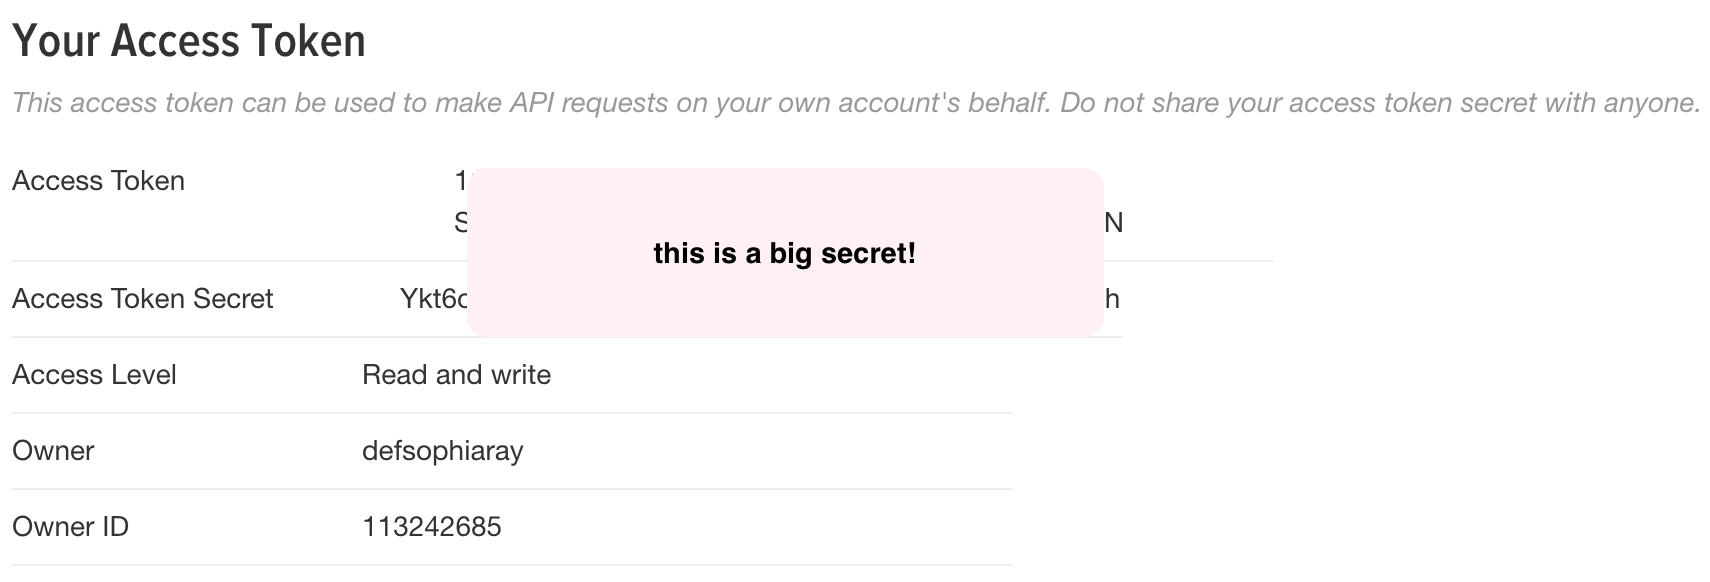

The twitter API gives us access to a bunch of different features. You can find the documentation [here](https://developer.twitter.com/en/docs/api-reference-index).

We'll call the `statuses/user_timeline` GET interface (more [here](https://developer.twitter.com/en/docs/tweets/timelines/api-reference/get-statuses-user_timeline)).



In [13]:
response = requests.get(
    "https://api.twitter.com/1.1/statuses/user_timeline.json", auth=oauth)

tweets = response.json()

tweets

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Tue Jul 09 21:41:30 +0000 2019',
  'entities': {'hashtags': [],
   'symbols': [],
   'urls': [],
   'user_mentions': [{'id': 1394399438,
     'id_str': '1394399438',
     'indices': [0, 11],
     'name': 'John Legere',
     'screen_name': 'JohnLegere'}]},
  'favorite_count': 0,
  'favorited': False,
  'geo': None,
  'id': 1148708783461490692,
  'id_str': '1148708783461490692',
  'in_reply_to_screen_name': 'JohnLegere',
  'in_reply_to_status_id': 1143664399833391104,
  'in_reply_to_status_id_str': '1143664399833391104',
  'in_reply_to_user_id': 1394399438,
  'in_reply_to_user_id_str': '1394399438',
  'is_quote_status': False,
  'lang': 'und',
  'place': None,
  'retweet_count': 0,
  'retweeted': False,
  'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
  'text': '@JohnLegere ss',
  'truncated': False,
  'user': {'contributors_enabled': False,
   'created_at': 'Sat Oct 28 16:05:02 +0000 2017',


In [26]:
t={"user":{"screen_name": "HumanoidHistory"},"id": 970447777053462528}

In [22]:
def get_replies(tweet):
    user = tweet.user.screen_name
    tweet_id = tweet.id
    max_id = None
    logging.info("looking for replies to: %s" % tweet_url(tweet))
    while True:
        q = urllib.parse.urlencode({"q": "to:%s" % user})
        try:
            replies = t.GetSearch(raw_query=q, since_id=tweet_id, max_id=max_id, count=100)
        except twitter.error.TwitterError as e:
            logging.error("caught twitter api error: %s", e)
            time.sleep(60)
            continue
        for reply in replies:
            logging.info("examining: %s" % tweet_url(reply))
            if reply.in_reply_to_status_id == tweet_id:
                logging.info("found reply: %s" % tweet_url(reply))
                yield reply
                # recursive magic to also get the replies to this reply
                for reply_to_reply in get_replies(reply):
                    yield reply_to_reply
            max_id = reply.id
        if len(replies) != 100:
            break


In [41]:
for key in tweets[0].keys():
    print(key)

created_at
id
id_str
text
truncated
entities
extended_entities
source
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
in_reply_to_screen_name
user
geo
coordinates
place
contributors
retweeted_status
is_quote_status
retweet_count
favorite_count
favorited
retweeted
possibly_sensitive
lang


In [42]:
for tweet in tweets:
    print(tweet['text'])

RT @LadyAhiru: #DnD in a Nutshell https://t.co/LsYlaoxTJi
mood https://t.co/VwtXwA6QBk
umbrellas are just rude
I’m going to A Thing tonight and I’m gonna be wearing 3” heels for like the 3rd time ever. Get ready for that 6’6” amazon look
@lovecrossbones I think your friend has graduated from being an egg! 🎉
RT @josephfcox: Scoop: Securus, the company which tracks nearly any phone across the US for cops with minimal oversight, has been hacked. H…
who else remembers Ping, Apple’s miserable failure at making a social network for music? https://t.co/bnglUT0XOS
@zenalbatross Janus I love you
@leftyscissors_ @callerdotcom let's at least wait until I can get some cute boots 👢
spring means so many cute tattoos in brooklyn
RT @timnitGebru: This is a difficult feat to achieve. They even managed to leave out the MEN who are pioneers. One has to laugh really. I c…
@neuroecology yeah, super handy!
@neuroecology none as standardized that I know of but a lot of the action recognition datasets are rea

In [6]:
for tweet in tweets:
    print(html.unescape(tweet['text']))

umbrellas are just rude
I’m going to A Thing tonight and I’m gonna be wearing 3” heels for like the 3rd time ever. Get ready for that 6’6” amazon look
@lovecrossbones I think your friend has graduated from being an egg! 🎉
RT @josephfcox: Scoop: Securus, the company which tracks nearly any phone across the US for cops with minimal oversight, has been hacked. H…
who else remembers Ping, Apple’s miserable failure at making a social network for music? https://t.co/bnglUT0XOS
@zenalbatross Janus I love you
@leftyscissors_ @callerdotcom let's at least wait until I can get some cute boots 👢
spring means so many cute tattoos in brooklyn
RT @timnitGebru: This is a difficult feat to achieve. They even managed to leave out the MEN who are pioneers. One has to laugh really. I c…
@neuroecology yeah, super handy!
@neuroecology none as standardized that I know of but a lot of the action recognition datasets are really good https://t.co/BfgyPBseIk
@mister_caron Good Q. I’ve been reluctant to explicitl

## Search

What if we don't want our personal TL? There's an API interface for that! We have [several search functions](https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets). 

In [47]:
parameters = {"q": "dungeons and dragons", "count":20}
response = requests.get("https://api.twitter.com/1.1/search/tweets.json",
                        params = parameters,
                        auth=oauth)
response.json().keys()

dict_keys(['statuses', 'search_metadata'])

In [48]:
pprint(response.json()['search_metadata'])

{'completed_in': 0.052,
 'count': 20,
 'max_id': 997176708821233664,
 'max_id_str': '997176708821233664',
 'next_results': '?max_id=997169212891148289&q=dungeons%20and%20dragons&count=20&include_entities=1',
 'query': 'dungeons+and+dragons',
 'refresh_url': '?since_id=997176708821233664&q=dungeons%20and%20dragons&include_entities=1',
 'since_id': 0,
 'since_id_str': '0'}


In [49]:
tweets = response.json()['statuses']

print('PAGE 1')
for tweet in tweets:
    print(tweet['id'], tweet['text'])

PAGE 1
997176708821233664 RT @SageAdviceDnD: The relevancy and fun of Dungeons &amp; Dragons by @JoeManganiello https://t.co/bNTFaHpGLj DnD
997176538104811520 I liked a @YouTube video https://t.co/R5Ct4IRRP1 Best Dungeon Master Tools and Tricks for Dungeons and Dragons 5e
997176171329720320 If you've ever played Dungeons and Dragons, YOU NEED THIS BOOK! 

Even if you've never played, it's a great story a… https://t.co/utRsfbvYfX
997175816659357697 RT @frita_pie: Midnight sketches of a character I made for a Dungeons and Dragons campaign. Super happy with how the tarot card turned out!…
997175632374222848 I’ve become one of those people who sees something interesting and goes ‘oh, that would be great in a Dungeons and Dragons campaign’.
997175524660260865 "This is part of a larger issue regarding a tendency among many American  converts to turn the Eastern liturgical r… https://t.co/7MoEuaGtFS
997174502109802496 RT @SageAdviceDnD: The relevancy and fun of Dungeons &amp; Dragons by @JoeM

In [50]:
search_url = "https://api.twitter.com/1.1/search/tweets.json"
next_page_url = search_url + response.json()['search_metadata']['next_results']

response = requests.get(next_page_url, auth=oauth)

print('PAGE 2')
for tweet in response.json()['statuses']:
    print(tweet['text'])

PAGE 2
Wild day today. Went to the bingo, had a nap, now im away to play dungeons and dragons in my girlfriends dads garage
@VanigliaRy @sugarpillmakeup @bhcosmetics @NyxCosmetics Oh also, dnd stands for? I didnt want to be stupid and assu… https://t.co/rN7F7UPUQ5
I added a video to a @YouTube playlist https://t.co/4uz9Y5r4LV Overpowered Spell is Wrecking Dungeons and Dragons 5th Edition Games
RT @SageAdviceDnD: The relevancy and fun of Dungeons &amp; Dragons by @JoeManganiello https://t.co/bNTFaHpGLj DnD
RT @SageAdviceDnD: The relevancy and fun of Dungeons &amp; Dragons by @JoeManganiello https://t.co/bNTFaHpGLj DnD
RT @SageAdviceDnD: The relevancy and fun of Dungeons &amp; Dragons by @JoeManganiello https://t.co/bNTFaHpGLj DnD
RT @Dunston_DropIn: ** NEW SESSION**
Dungeons and Dragons 
Thursdays 5-8pm
Ages 10-14
Pre-gen charters provided
£1 entry https://t.co/A7sOI…
I know that DND on my phone stands for "Do Not Disturb" but every now and then I still do a double-take like "Dungeons a

#### STREAMING API ~ TWEEPY

In [51]:
auth = tweepy.OAuthHandler(config["consumer_key"],
                           config["consumer_secret"])
auth.set_access_token(config["access_token"],
                      config["access_token_secret"])

api=tweepy.API(auth)

In [52]:
max_tweets = 100
len(list(tweepy.Cursor(api.search,q="cher").items(max_tweets)))

100

In [53]:
max_tweets=10

#Tweepy Cursor handles pagination .. 

for tweet in tweepy.Cursor(api.search,q="cher").items(max_tweets):
    print(tweet)

Status(_api=<tweepy.api.API object at 0x108f16588>, _json={'created_at': 'Thu May 17 18:10:24 +0000 2018', 'id': 997177531521519616, 'id_str': '997177531521519616', 'text': "RT @Zack_Nani: Mdrr je comprends l'actu et tout mais putain on va se taper tous les reportages dans le Loir et Cher alors qu'on veut juste…", 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Zack_Nani', 'name': 'Zack', 'id': 463590027, 'id_str': '463590027', 'indices': [3, 13]}], 'urls': []}, 'metadata': {'iso_language_code': 'fr', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 2325860090, 'id_str': '2325860090', 'name': 'Richard Alpert', 'screen_name': 'Raphadu44', 'location': 'Nantes, Munich', 'description': '@FCbay

In [54]:
results=[]


for tweet in tweepy.Cursor(api.search,q="cher").items(1000):
    results.append(tweet)


#### Import tweets into Pandas

In [55]:
#  import pandas as pd
def structure_results(results):
    id_list=[tweet.id for tweet in results]
    data=pd.DataFrame(id_list,columns=['id'])
    
    data["text"]= [tweet.text.encode('utf-8') for tweet in results]
    data["datetime"]=[tweet.created_at for tweet in results]
    data["Location"]=[tweet.place for tweet in results]
    
    return data

In [56]:
data=structure_results(results)
data.head(20)

id                                               text  \
0   997177634797817856  b"RT @Zack_Nani: Mdrr je comprends l'actu et t...   
1   997177628938338304  b"RT @Zack_Nani: Mdrr je comprends l'actu et t...   
2   997177610185658368  b"RT @Zack_Nani: Mdrr je comprends l'actu et t...   
3   997177608692432902  b"RT @thop59: les gens qui croient que mettre ...   
4   997177603147649024  b'grave les fans de bts vous vous rendez compt...   
5   997177601780322304  b"RT @Zack_Nani: Mdrr je comprends l'actu et t...   
6   997177600240910337  b"RT @Zack_Nani: Mdrr je comprends l'actu et t...   
7   997177599389511682  b"RT @Zack_Nani: Mdrr je comprends l'actu et t...   
8   997177579424632833  b"RT @Zack_Nani: Mdrr je comprends l'actu et t...   
9   997177577738522624  b"RT @Zack_Nani: Mdrr je comprends l'actu et t...   
10  997177574685061130  b"RT @Zack_Nani: Mdrr je comprends l'actu et t...   
11  997177562278359042  b"RT @Zack_Nani: Mdrr je comprends l'actu et t...   
12  997177557849198592  b'I posted my favorite @cher twitter moments o...   
13  997177540258254850  b"C'est trop dit mon cher https://t.co/nfcp0cH...   
14  997177537708032000  b"RT @Zack_Nani: Mdrr je comprends l'actu et t...   
15  997177537682989057  b'International Museum Day - Artist Demonstrat...   
16  997177531521519616  b"RT @Zack_Nani: Mdrr je comprends l'actu et t...   
17  997177520683454464  b"RT @Zack_Nani: Mdrr je comprends l'actu et t...   
18  997177502853402625  b"RT @Zack_Nani: Mdrr je comprends l'actu et t...   
19  997177501905506304  b"RT @Zack_Nani: Mdrr je comprends l'actu et t...   

              datetime Location  
0  2018-05-17 18:10:49     None  
1  2018-05-17 18:10:48     None  
2  2018-05-17 18:10:43     None  
3  2018-05-17 18:10:43     None  
4  2018-05-17 18:10:41     None  
5  2018-05-17 18:10:41     None  
6  2018-05-17 18:10:41     None  
7  2018-05-17 18:10:41     None  
8  2018-05-17 18:10:36     None  
9  2018-05-17 18:10:35     None  
10 2018-05-17 18:10:35     None  
11 2018-05-17 18:10:32     None  
12 2018-05-17 18:10:31     None  
13 2018-05-17 18:10:26     None  
14 2018-05-17 18:10:26     None  
15 2018-05-17 18:10:26     None  
16 2018-05-17 18:10:24     None  
17 2018-05-17 18:10:22     None  
18 2018-05-17 18:10:17     None  
19 2018-05-17 18:10:17     None

#### Import Tweets into MongoDB

Install mongo locally with brew:    
```
brew update    
brew install mongodb
```
After downloading mongo, we want to create a place for mongo data files to live.  Run:    
```
sudo mkdir -p /data/db
```
Make sure that /data/db directory has the right permissions:

```
sudo chown `active_username` /data/db
(enter password) 
```

(username ~ is just mac username (you can double
check this by running 'whoami' in the terminal)


Run mongo daemon:
```
mongod
```

(In order to access direct mongo functionality, you can just
run 'mongo' in a separate terminal)

In [57]:
import json
from pymongo import MongoClient


client = MongoClient()
db = client.legislation2
tweets = db.news

In [58]:
db = client.legislation2
tweets = db.news3

In [59]:
tweet.text.encode()

b'@hobiscuiit C vrai que le "ps cher" n\'est pas appropri\xc3\xa9 ds cette situations, et  effectivement (en \xc3\xa9tant radine sur\xe2\x80\xa6 https://t.co/L9i8Meu45M'

In [60]:
tweet.created_at

datetime.datetime(2018, 5, 17, 17, 13, 27)

In [61]:
for tweet in results:
    tweets.insert_one({
        "tweet": tweet.text.encode(),
        "datetime": tweet.created_at
    })

In [62]:
tweets.find_one()

{'_id': ObjectId('5afd8a4e8786174c842cf0c8'),
 'tweet': b'RT @Roobynet: Pouaaah les gens qui commence a sortir des \xc2\xab\xc2\xa0arr\xc3\xaatez de vous plaindre pour le prix des places vip\xc2\xa0cnest pas si cher \xc2\xbb concern\xe2\x80\xa6',
 'datetime': datetime.datetime(2018, 5, 17, 13, 31, 44)}

In [64]:
print(results[0].text)

RT @Zack_Nani: Mdrr je comprends l'actu et tout mais putain on va se taper tous les reportages dans le Loir et Cher alors qu'on veut juste…


In [31]:
print("@LEXPRESS - Tu as combien de m2 toi? \n- 176. \n- C'est cher? \n- 600 €, mais 60 € de charges.\n- Tu te fais arnaquer.")

@LEXPRESS - Tu as combien de m2 toi? 
- 176. 
- C'est cher? 
- 600 €, mais 60 € de charges.
- Tu te fais arnaquer.


In [32]:
import sys
import json
import time
import logging
import twitter
import urllib.parse

from os import environ as e

In [40]:
def tweet_url(t):
    return "https://twitter.com/%s/status/%s" % (t.user.screen_name, t.id)

def get_tweets(filename):
    for line in open(filename):
        yield twitter.Status.NewFromJsonDict(json.loads(line))

def get_replies(tweet):
    user = tweet.user.screen_name
    tweet_id = tweet.id
    max_id = None
    logging.info("looking for replies to: %s" % tweet_url(tweet))
    while True:
        q = urllib.parse.urlencode({"q": "to:%s" % user})
        try:
            replies = t.GetSearch(raw_query=q, since_id=tweet_id, max_id=max_id, count=100)
        except twitter.error.TwitterError as e:
            logging.error("caught twitter api error: %s", e)
            time.sleep(60)
            continue
        for reply in replies:
            logging.info("examining: %s" % tweet_url(reply))
            if reply.in_reply_to_status_id == tweet_id:
                logging.info("found reply: %s" % tweet_url(reply))
                yield reply
                # recursive magic to also get the replies to this reply
                for reply_to_reply in get_replies(reply):
                    yield reply_to_reply
            max_id = reply.id
        if len(replies) != 100:
            break
